In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
!pip install pyarrow

  Using cached pyarrow-16.1.0-cp39-cp39-manylinux_2_28_x86_64.whl (40.8 MB)


In [4]:
##reading in time series data and evenly sampling it. Although this dataset is already finely sampled and this step isn't necessary I decided to keep it since I have it anyway


df_single = pd.read_feather("timeseries_single_frequency.feather")
index_sampled_single=[]
values_sampled_single=[]
x_dat=[]
for i in range(0,1000):
    #interpolating the sine curve
    spl = interp1d(df_single.index, df_single[df_single.columns.values[i]].values, kind='nearest')
    #evenly sampling the x axis between the min and max time value
    x_new = np.linspace(min(df_single[df_single.columns.values[i]].values),max(df_single[df_single.columns.values[i]].values), 100)
    y_new = spl(df_single.index)
    #choosing the first 40 points as input feature
    index_sampled_single.append(y_new[:40])
    #choosing the last 10 points as "labels"- this is what we are predicting
    values_sampled_single.append(y_new[-10:])
    x_dat.append(x_new)
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    index_sampled_single,values_sampled_single, test_size=0.05, random_state=0)

In [5]:
print(np.shape(index_sampled_single))

(1000, 40)


In [7]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

normalizer = layers.Normalization()
normalizer.adapt(X_train)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_root_mean_squared_error",
        factor=0.1,
        patience=5,
        verbose=1,
        min_delta=0.0001,
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_root_mean_squared_error",
        min_delta=1e-6,
        patience=10,
        verbose=1,
    )
]
model = keras.Sequential([
    normalizer,
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='linear') 
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    X_train, 
    y_train,
    batch_size=128,
    epochs=200,
    validation_data=(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)),
    callbacks=callbacks
)


Epoch 1/200
8/8 [==============================] - 1s 18ms/step - loss: 1.0222 - root_mean_squared_error: 1.0110 - val_loss: 0.8167 - val_root_mean_squared_error: 0.9037 - lr: 0.0010
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 0.8229 - root_mean_squared_error: 0.9071 - val_loss: 0.6947 - val_root_mean_squared_error: 0.8335 - lr: 0.0010
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7041 - root_mean_squared_error: 0.8391 - val_loss: 0.6036 - val_root_mean_squared_error: 0.7769 - lr: 0.0010
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6168 - root_mean_squared_error: 0.7854 - val_loss: 0.5380 - val_root_mean_squared_error: 0.7335 - lr: 0.0010
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5491 - root_mean_squared_error: 0.7410 - val_loss: 0.4840 - val_root_mean_squared_error: 0.6957 - lr: 0.0010
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4927 - root_mean

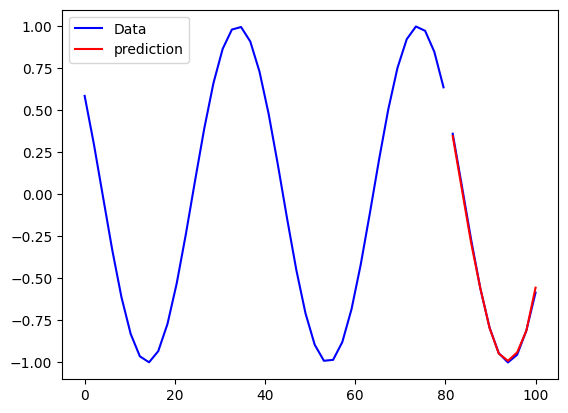

In [8]:
predictions = model.predict( tf.convert_to_tensor(X_test))

plt.plot(df_single.index[:40],X_test[0], color= 'blue', label='Data')
plt.plot(df_single.index[-10:],y_test[0], color= 'blue')
plt.plot(df_single.index[-10:],predictions[0], color= 'red', label ='prediction')
plt.legend()

In [69]:
df_single = pd.read_feather("timeseries_multiple_frequency.feather")
index_sampled_single=[]
values_sampled_single=[]

for i in range(0,1000):
    spl = interp1d(df_single.index, df_single[df_single.columns.values[i]].values, kind='cubic')
    x_new = np.linspace(min(df_single[df_single.columns.values[i]].values),max(df_single[df_single.columns.values[i]].values), 50)
    y_new = spl(df_single.index)
    index_sampled_single.append(y_new[:40])
    values_sampled_single.append(y_new[-10:])

X_train, X_test, y_train, y_test = train_test_split(
    index_sampled_single,values_sampled_single, test_size=0.05, random_state=0)



In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

normalizer = layers.Normalization()
normalizer.adapt(X_train)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_root_mean_squared_error",
        factor=0.1,
        patience=5,
        verbose=1,
        min_delta= 1e-8,
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_root_mean_squared_error",
        min_delta=1e-8,
        patience=10,
        verbose=1,
    )
]
model = keras.Sequential([
    normalizer,
    layers.Dense(2, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='linear') 
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)


history = model.fit(
    X_train, 
    y_train,
    batch_size=128,
    epochs=200,
    validation_data=(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)),
    callbacks=callbacks
)


Epoch 1/200
8/8 [==============================] - 1s 21ms/step - loss: 0.5227 - root_mean_squared_error: 0.7229 - val_loss: 0.5116 - val_root_mean_squared_error: 0.7153 - lr: 0.0010
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5088 - root_mean_squared_error: 0.7133 - val_loss: 0.5045 - val_root_mean_squared_error: 0.7103 - lr: 0.0010
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5028 - root_mean_squared_error: 0.7091 - val_loss: 0.5002 - val_root_mean_squared_error: 0.7072 - lr: 0.0010
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.4988 - root_mean_squared_error: 0.7063 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050 - lr: 0.0010
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4954 - root_mean_squared_error: 0.7038 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7026 - lr: 0.0010
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4920 - root_mean

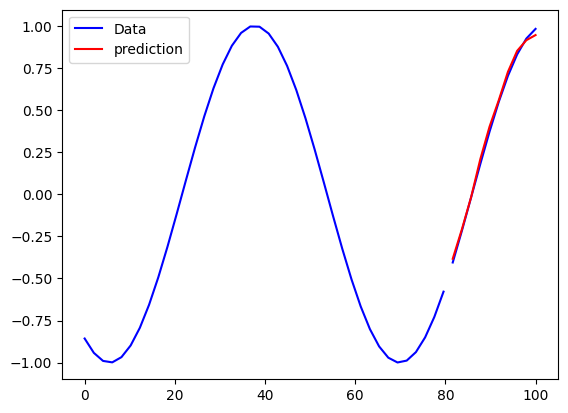

In [ ]:
predictions = model.predict( tf.convert_to_tensor(X_test))

plt.plot(df_single.index[:40],X_test[4], color= 'blue', label='Data')
plt.plot(df_single.index[-10:],y_test[4], color= 'blue')
plt.plot(df_single.index[-10:],predictions[4], color= 'red', label ='prediction')
plt.legend()

In [22]:
df_single = pd.read_feather("timeseries_multiple_frequency_sampled.feather")
index_sampled_single=[]
values_sampled_single=[]

for i in range(0,5000):
    spl = interp1d(df_single[df_single.columns.values[i]].index, df_single[df_single.columns.values[i]].values, kind='cubic')
    y_new = spl(df_single[df_single.columns.values[i]].index)
    index_sampled_single.append(y_new[:40])
    values_sampled_single.append(y_new[-10:])

X_train, X_test, y_train, y_test = train_test_split(
    index_sampled_single,values_sampled_single, test_size=0.05, random_state=0)



In [26]:
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split

df_single = pd.read_feather("timeseries_multiple_frequency_sampled.feather")
index_sampled_single=[]
values_sampled_single=[]

for i in range(0,500):
    column_data = df_single.iloc[:, i]  
    clean_column_data = column_data.dropna()
    
    spl = interp1d(clean_column_data.index, clean_column_data.values, kind='cubic', fill_value="extrapolate")
    
    y_new = spl(np.linspace(np.min(clean_column_data.index),np.max(clean_column_data.index),50))

    index_sampled_single.append(y_new[:40])
    values_sampled_single.append(y_new[-10:])
    


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    index_sampled_single,values_sampled_single, test_size=0.05, random_state=0)


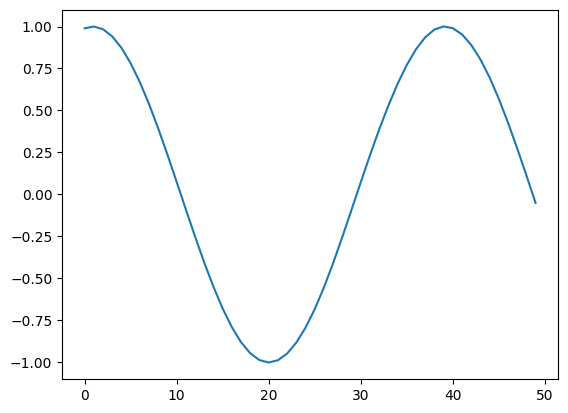

In [28]:
plt.plot(y_new)

In [33]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

normalizer = layers.Normalization()
normalizer.adapt(X_train)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_root_mean_squared_error",
        factor=0.1,
        patience=5,
        verbose=1,
        min_delta= 1e-8,
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_root_mean_squared_error",
        min_delta=1e-8,
        patience=10,
        verbose=1,
    )
]
model = keras.Sequential([
    normalizer,
    layers.Dense(2, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='linear'),
    layers.Dense(10, activation='linear') 
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)


history = model.fit(
    X_train, 
    y_train,
    batch_size=128,
    epochs=500,
    validation_data=(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)),
    callbacks=callbacks
)


Epoch 1/500
4/4 [==============================] - 1s 56ms/step - loss: 0.6193 - root_mean_squared_error: 0.7869 - val_loss: 0.6787 - val_root_mean_squared_error: 0.8238 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5663 - root_mean_squared_error: 0.7526 - val_loss: 0.6394 - val_root_mean_squared_error: 0.7996 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5408 - root_mean_squared_error: 0.7354 - val_loss: 0.6141 - val_root_mean_squared_error: 0.7836 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5224 - root_mean_squared_error: 0.7227 - val_loss: 0.5915 - val_root_mean_squared_error: 0.7691 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5080 - root_mean_squared_error: 0.7127 - val_loss: 0.5723 - val_root_mean_squared_error: 0.7565 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4964 - root_m

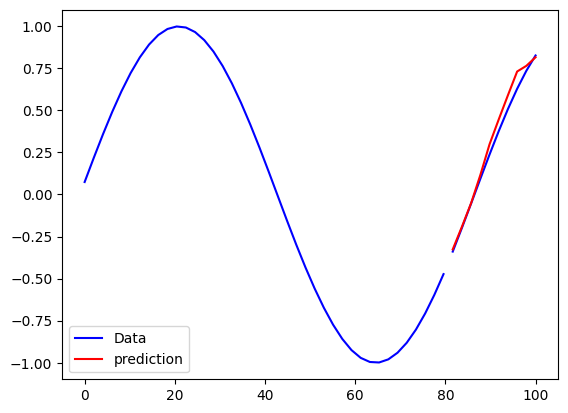

In [35]:
predictions = model.predict(tf.convert_to_tensor(X_test))

plt.plot(df_single.index[:40],X_test[4], color= 'blue', label='Data')
plt.plot(df_single.index[-10:],y_test[4], color= 'blue')
plt.plot(df_single.index[-10:],predictions[4], color= 'red', label ='prediction')
plt.legend()

In [60]:
index_sampled=[]
values_sampled=[]
x_dat=[]

plasticc_metadata = pd.read_pickle('plasticc_lightcurves_g_metadata.pkl')
with open('plasticc_lightcurves_g.pkl', 'rb') as file:
    plasticc_LC = pickle.load(file)

for i in range(0,1135):
    spl = interp1d(plasticc_LC[plasticc_metadata['object_id'].iloc[i]].index, plasticc_LC[plasticc_metadata['object_id'].iloc[i]].values, kind='cubic', fill_value= 'extrapolate')
    x_new = np.linspace(min(plasticc_LC[plasticc_metadata['object_id'].iloc[i]].index),max(plasticc_LC[plasticc_metadata['object_id'].iloc[i]].index), 50)
    y_new = spl(x_new)
    index_sampled.append(y_new[:49])
    values_sampled.append(y_new[-1:])
    x_dat.append(x_new)
X_train, X_test, y_train, y_test = train_test_split(index_sampled,values_sampled, test_size=0.05, random_state=0)



In [87]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

normalizer = layers.Normalization()
normalizer.adapt(X_train)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_root_mean_squared_error",
        factor=0.1,
        patience=5,
        verbose=1,
        min_delta=0.0001,
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_root_mean_squared_error",
        min_delta=1e-8,
        patience=10,
        verbose=1,
    )
]
model = keras.Sequential([
    normalizer,
    layers.Dense(2, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='relu') 
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-2),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    X_train, 
    y_train,
    batch_size=128,
    epochs=200,
    validation_data=(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)),
    callbacks=callbacks
)


Epoch 1/200
9/9 [==============================] - 0s 19ms/step - loss: 2621051.5000 - root_mean_squared_error: 1618.9662 - val_loss: 4056207.0000 - val_root_mean_squared_error: 2014.0027 - lr: 0.0100
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 2621006.5000 - root_mean_squared_error: 1618.9523 - val_loss: 4056604.0000 - val_root_mean_squared_error: 2014.1013 - lr: 0.0100
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 2620876.5000 - root_mean_squared_error: 1618.9121 - val_loss: 4057821.7500 - val_root_mean_squared_error: 2014.4036 - lr: 0.0100
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 2620511.5000 - root_mean_squared_error: 1618.7994 - val_loss: 4060180.5000 - val_root_mean_squared_error: 2014.9890 - lr: 0.0100
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 2619937.2500 - root_mean_squared_error: 1618.6221 - val_loss: 4064484.5000 - val_root_mean_squared_error: 2016.0566 - lr: 0.0100

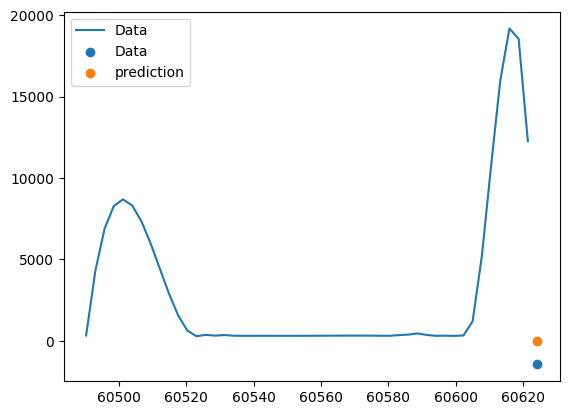

In [88]:
predictions = model.predict( tf.convert_to_tensor(y_test))

plt.plot(x_dat[2][:49], X_test[3], label='Data')
plt.scatter(x_dat[2][-1:], y_test[3], label='Data')
plt.scatter(x_dat[2][-1:],predictions[3], label ='prediction')
plt.legend()